# Porto Seguro's Safe Driver Prediction

## Predict if a driver will file an insurance claim next year.

![](https://storage.googleapis.com/kaggle-competitions/kaggle/7082/logos/header.png)

---

## Defining the Problem Statement

Kaggle Competition : [Porto Seguro's Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction)

Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years.

Porto Seguro, one of Brazil’s largest auto and homeowner insurance companies, completely agrees. Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.

In this competition, you’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. While Porto Seguro has used machine learning for the past 20 years, they’re looking to Kaggle’s machine learning community to explore new, more powerful methods. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

---

## Collecting the Data

### Data Description
In this competition, you will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

### File descriptions
- train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.
- test.csv contains the test data.
- sample_submission.csv is submission file showing the correct format.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import missingno as msno # 결측치를 처리하기 위한

plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
sns.set() # setting seaborn default for plots
pd.set_option('display.max_columns', 500) # feature가 많은걸 대비해서 확장해둠
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

#  EDA ( Exploratory Data Analysis )

## Check Shape of Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

(595212, 59) (892816, 58)


In [3]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [4]:
test.tail()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
892811,1488022,0,1,6,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0.5,0.3,1.048809,0,1,-1,8,0,14,0,1,0,1,18,2,0.565685,1.528774,0.565685,3.605551,0.3,0.4,0.9,1,1,7,3,10,3,10,4,2,3,4,0,1,0,0,1,0
892812,1488023,5,3,5,1,0,0,0,1,0,0,0,0,0,0,11,1,0,0,0.7,1.0,1.246495,8,1,-1,0,0,10,1,0,0,1,83,2,0.424264,1.040567,0.418569,3.741657,0.3,0.2,0.6,1,3,7,3,10,4,9,6,2,2,11,0,0,1,1,0,0
892813,1488024,0,1,5,0,0,1,0,0,0,0,0,0,0,0,5,0,0,1,0.4,0.0,0.609303,11,1,-1,0,-1,11,1,0,1,1,17,2,0.374166,0.968992,0.390384,3.741657,0.3,0.3,0.9,2,1,10,4,8,2,8,5,2,2,11,0,1,1,0,0,0
892814,1488025,6,1,5,1,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.6,0.6,0.920937,10,0,-1,0,1,10,1,1,0,1,28,3,0.387298,0.725125,0.378153,2.645751,0.1,0.1,0.3,1,1,9,2,10,1,8,1,1,2,7,1,1,0,0,0,0
892815,1488026,7,1,4,1,0,0,0,0,1,0,0,0,0,0,12,1,0,0,0.9,0.8,0.992157,9,1,1,0,0,4,1,1,2,1,48,1,0.316228,0.637175,0.296648,3.316625,0.4,0.4,0.2,3,4,7,2,8,4,15,5,2,2,7,0,1,1,1,0,0


## Check Type of Features

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

데이터를 간단하게 살펴보면 모두 **암호화**된 변수라서 특별히 describe을 통해서 얻을 수 있는 것은 없었다. 

In [6]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

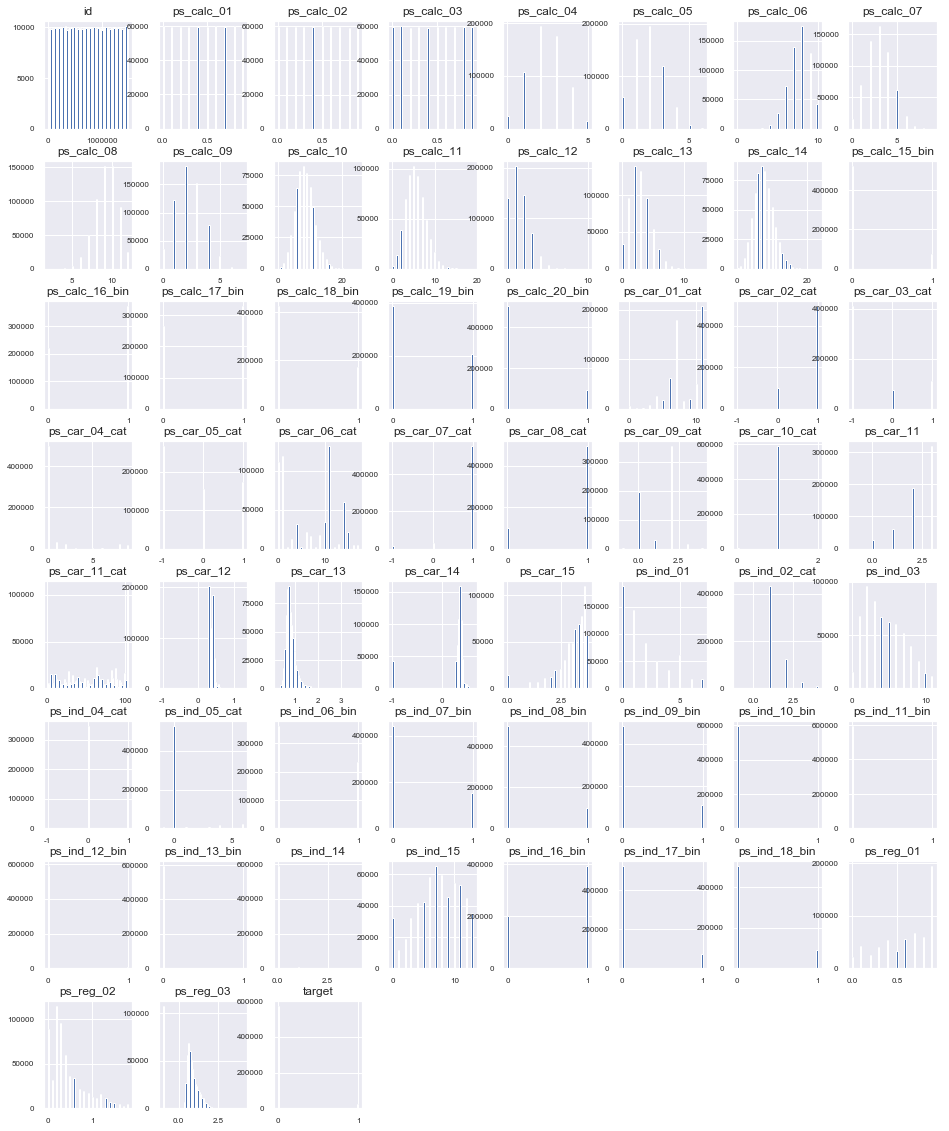

In [7]:
train.hist(figsize=(16,20), bins=60, xlabelsize=8, ylabelsize=8);

## Check Null Value

In [8]:
#train.isnull().sum() > No!

In [9]:
(train == -1).sum() #missing value를 -1이라 지정해줬음

id                0     
target            0     
ps_ind_01         0     
ps_ind_02_cat     216   
ps_ind_03         0     
ps_ind_04_cat     83    
ps_ind_05_cat     5809  
ps_ind_06_bin     0     
ps_ind_07_bin     0     
ps_ind_08_bin     0     
ps_ind_09_bin     0     
ps_ind_10_bin     0     
ps_ind_11_bin     0     
ps_ind_12_bin     0     
ps_ind_13_bin     0     
ps_ind_14         0     
ps_ind_15         0     
ps_ind_16_bin     0     
ps_ind_17_bin     0     
ps_ind_18_bin     0     
ps_reg_01         0     
ps_reg_02         0     
ps_reg_03         107772
ps_car_01_cat     107   
ps_car_02_cat     5     
ps_car_03_cat     411231
ps_car_04_cat     0     
ps_car_05_cat     266551
ps_car_06_cat     0     
ps_car_07_cat     11489 
ps_car_08_cat     0     
ps_car_09_cat     569   
ps_car_10_cat     0     
ps_car_11_cat     0     
ps_car_11         5     
ps_car_12         1     
ps_car_13         0     
ps_car_14         42620 
ps_car_15         0     
ps_calc_01        0     


In [10]:
missing_df = (train == -1).sum().reset_index()
missing_df.columns = ['column', 'count']
missing_df['ratio'] = missing_df['count'] / len(train) * 100
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio
3,ps_ind_02_cat,216,0.036290
5,ps_ind_04_cat,83,0.013945
6,ps_ind_05_cat,5809,0.975955
22,ps_reg_03,107772,18.106490
23,ps_car_01_cat,107,0.017977
24,ps_car_02_cat,5,0.000840
25,ps_car_03_cat,411231,69.089837
27,ps_car_05_cat,266551,44.782531
29,ps_car_07_cat,11489,1.930237
31,ps_car_09_cat,569,0.095596


결측값이 10% 이상인 ps_reg_03, ps_car_03_cat, ps_car_05_cat는 drop

In [13]:
import copy
train_copy = copy.copy(train)
train_copy = train_copy.replace(-1, np.NaN)

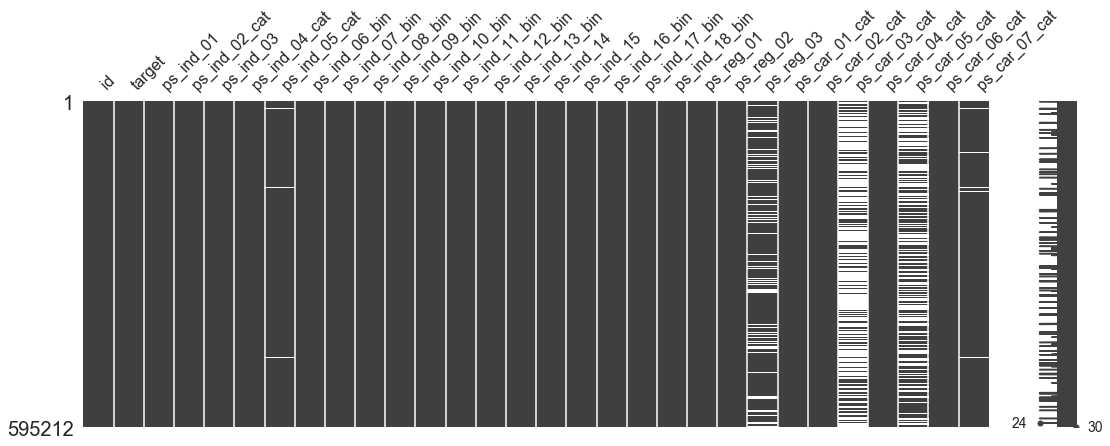

In [14]:
msno.matrix(train_copy.iloc[:,:30], figsize=(18,6));

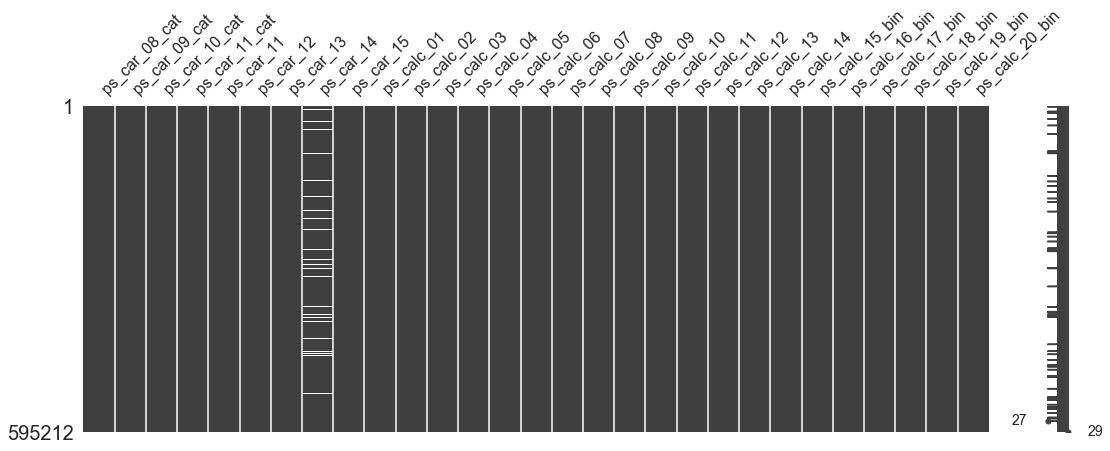

In [15]:
msno.matrix(train_copy.iloc[:,30:], figsize=(18,6)); 

## Check Dependent Variable

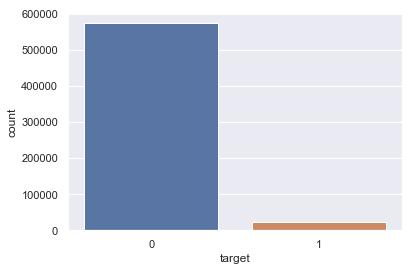

In [16]:
sns.countplot(train.target)

In [17]:
train['target'].value_counts()

0    573518
1    21694 
Name: target, dtype: int64

In [18]:
train['target'].value_counts() / len(train) * 100

0    96.355248
1    3.644752 
Name: target, dtype: float64

target 0 : 96%, 1 : 3%로 불균형이 심한 데이터이므로 resampling 방법 이용

## Check Binary Variable
57개의 변수 중 17개의 binary 변수 (~bin)

In [19]:
binary = [x for x in train.columns if x[-3:] == 'bin']
binary

['ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [20]:
train[binary].sum()

ps_ind_06_bin     234360
ps_ind_07_bin     152989
ps_ind_08_bin     97568 
ps_ind_09_bin     110295
ps_ind_10_bin     222   
ps_ind_11_bin     1007  
ps_ind_12_bin     5618  
ps_ind_13_bin     564   
ps_ind_16_bin     393330
ps_ind_17_bin     72069 
ps_ind_18_bin     91333 
ps_calc_15_bin    72870 
ps_calc_16_bin    373698
ps_calc_17_bin    329856
ps_calc_18_bin    170934
ps_calc_19_bin    207743
ps_calc_20_bin    91257 
dtype: int64

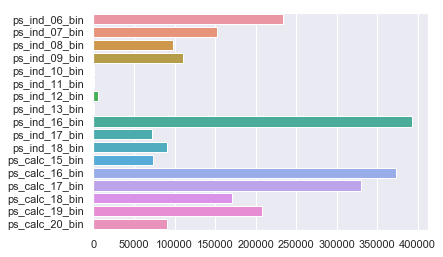

In [21]:
sns.barplot(x = train[binary].sum(), y = binary, orient='h')

target 1에서 가장 많이 발생한 binary 변수

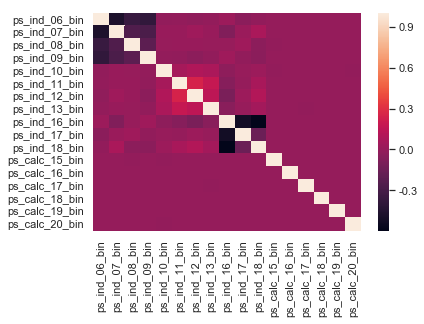

In [22]:
sns.heatmap(train[binary].corr())

## Check Categorical Variable
57개의 변수 중 14개의 categorical variable (~cat)

In [23]:
categorical = [x for x in train.columns if x[-3:] == 'cat']
categorical

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`;

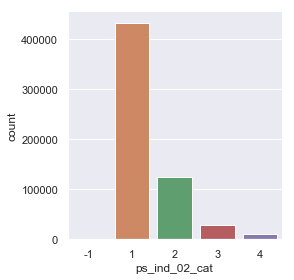

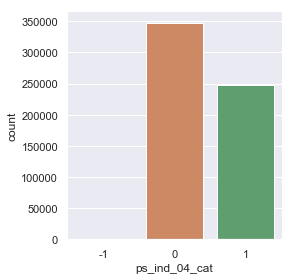

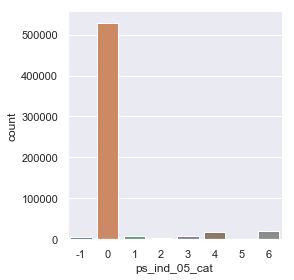

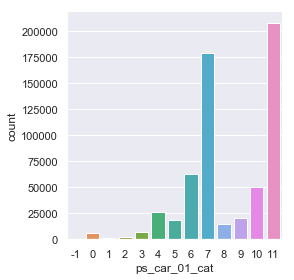

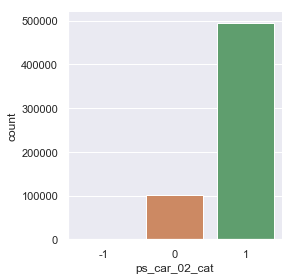

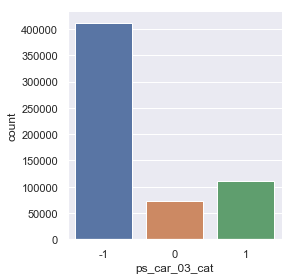

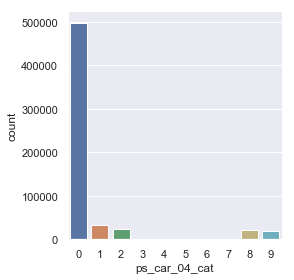

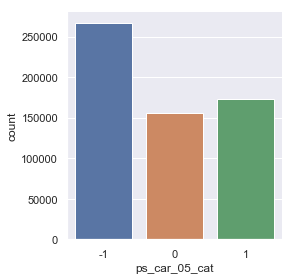

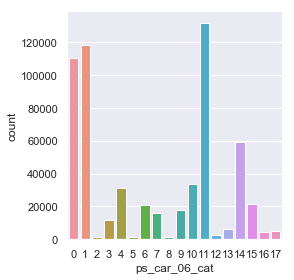

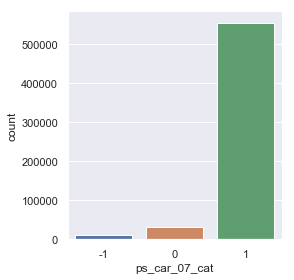

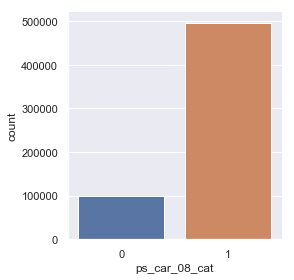

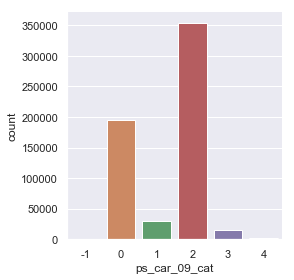

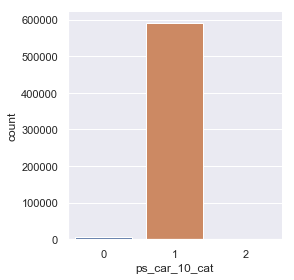

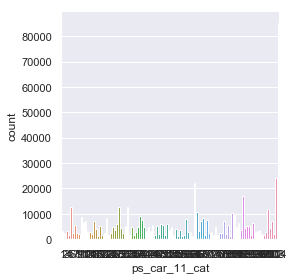

In [24]:
for i in categorical:
    sns.factorplot(x=i, data=train, kind='count',size=4, aspect=1) 

##  Check Continuous&Ordinal Variable
57개의 변수 중 binary, cetegorical를 제외한 나머지 28개의 변수

In [25]:
numeric = [x for x in train.columns if (x not in binary) & (x not in categorical)]
numeric

['id',
 'target',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\si

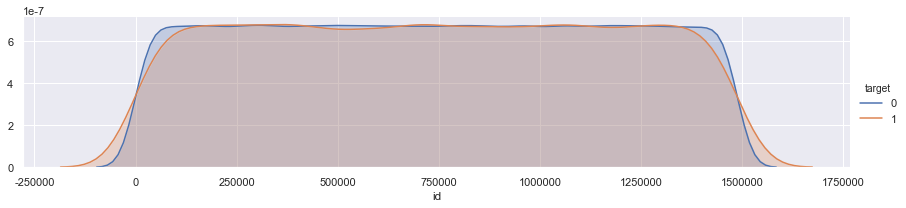

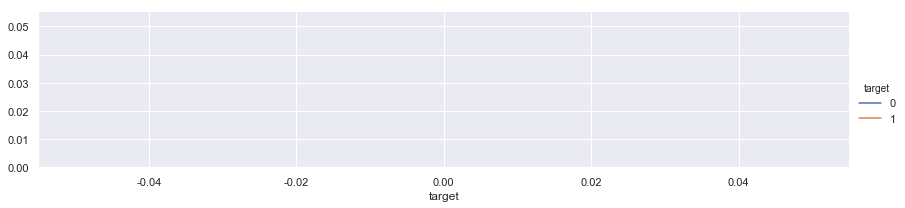

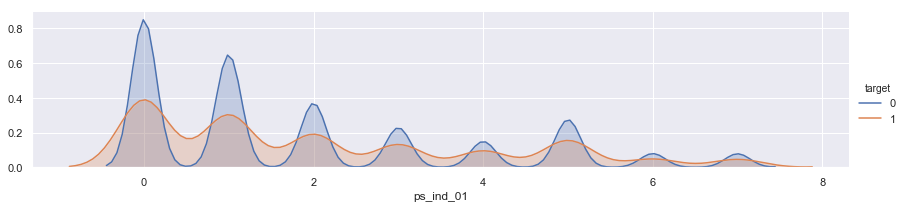

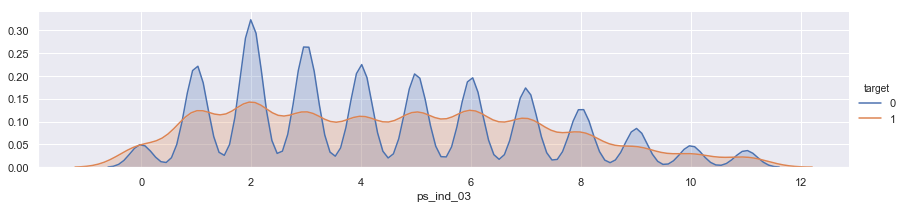

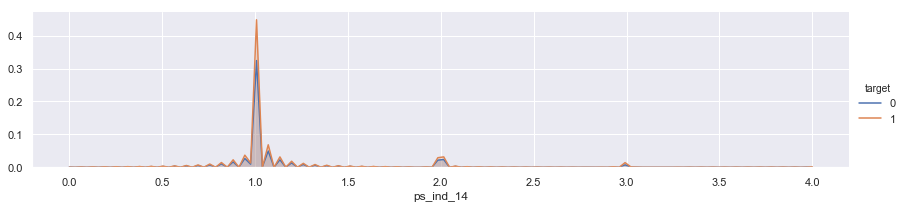

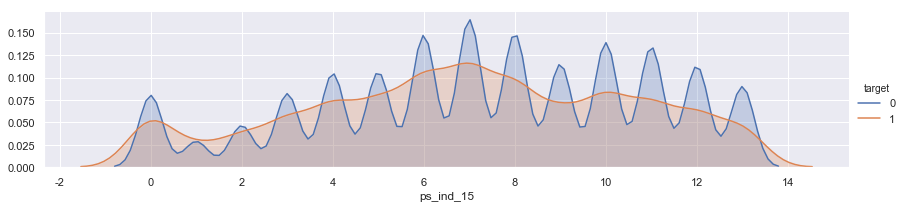

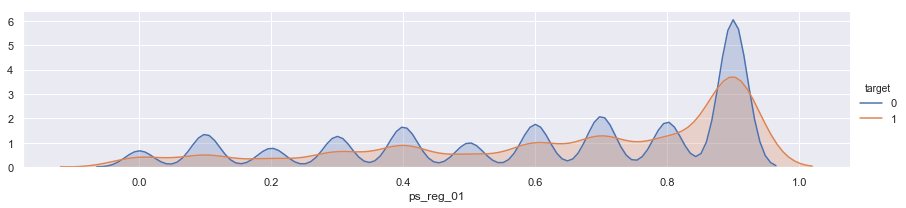

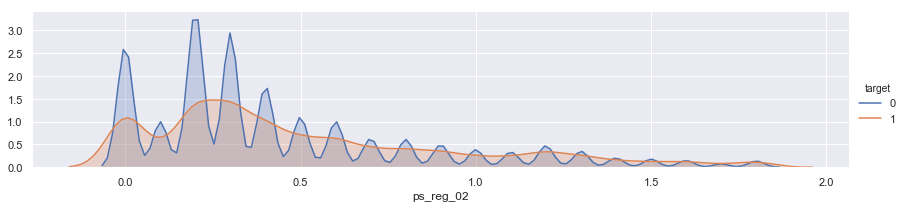

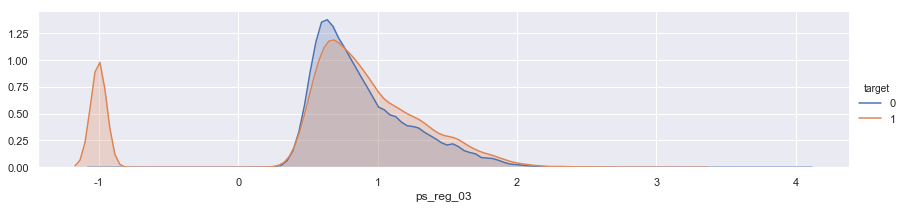

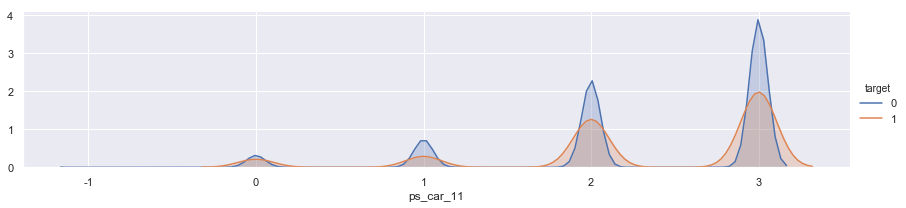

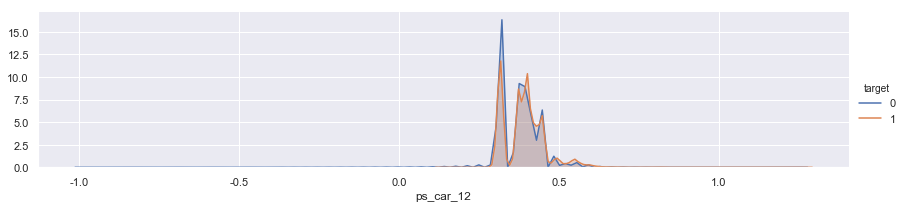

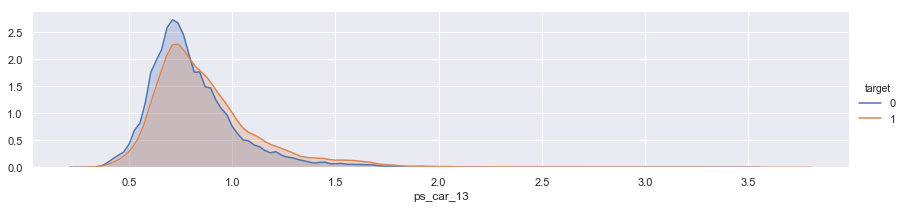

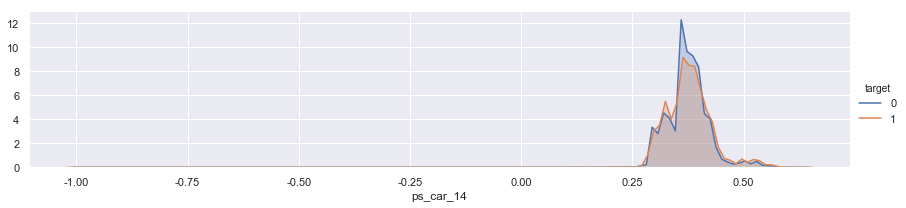

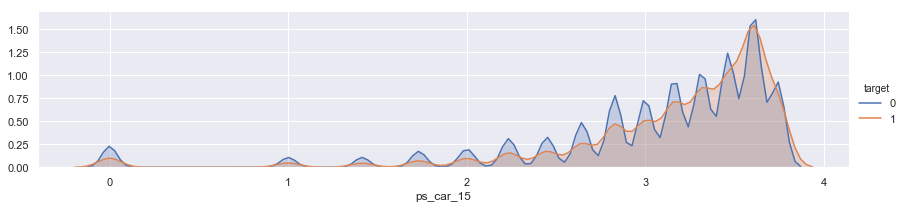

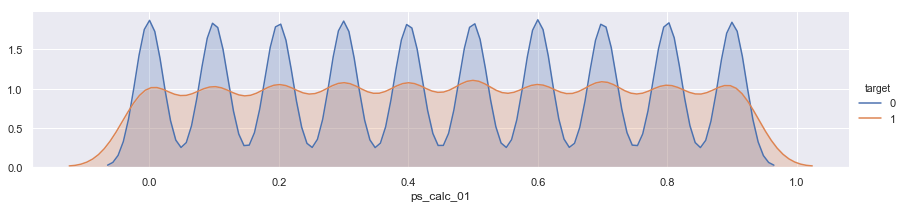

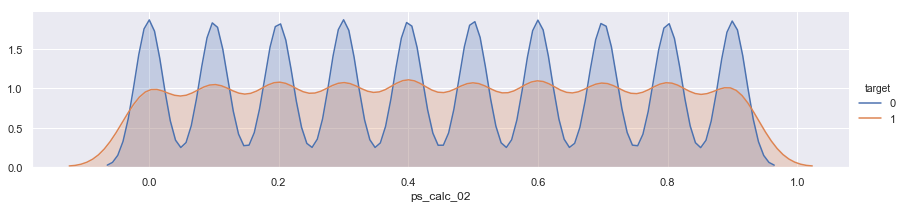

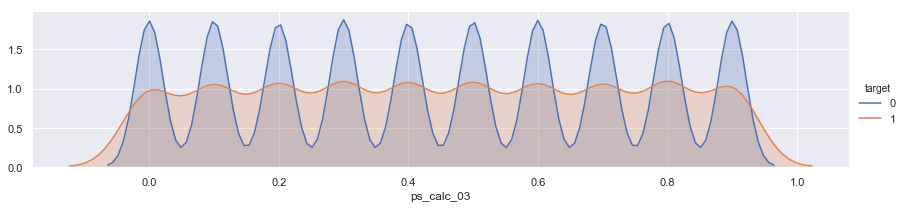

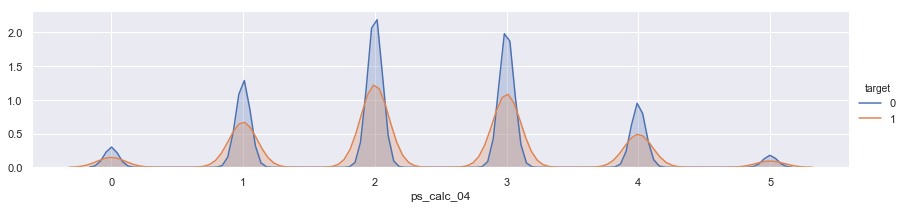

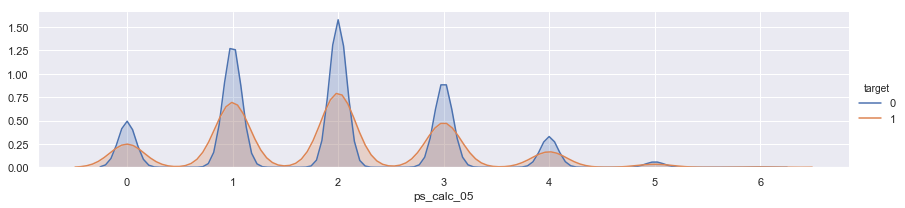

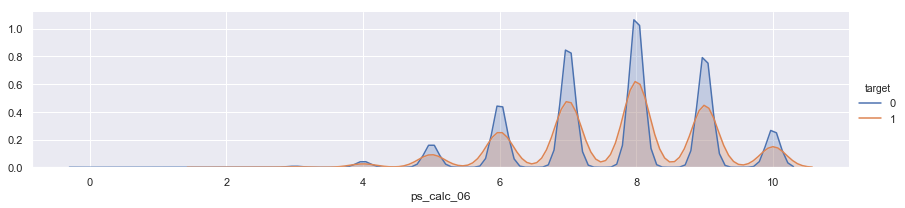

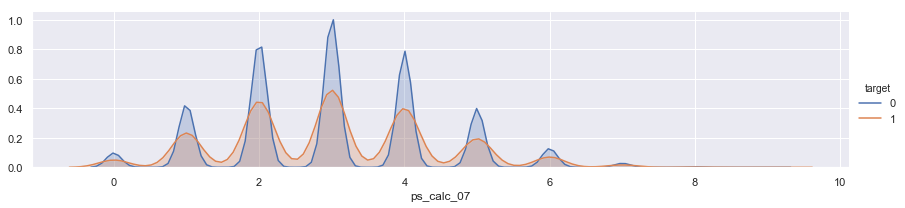

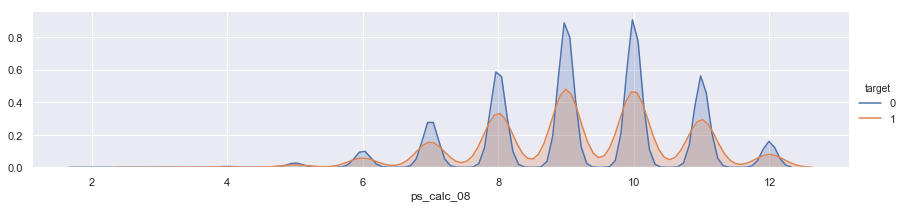

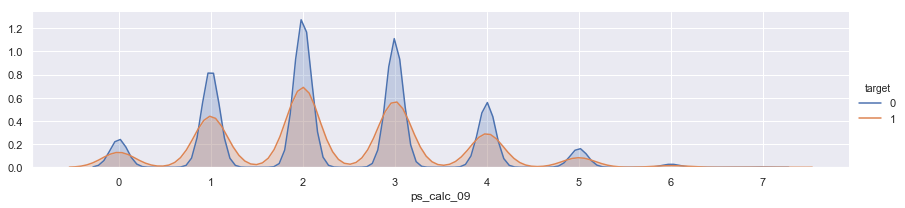

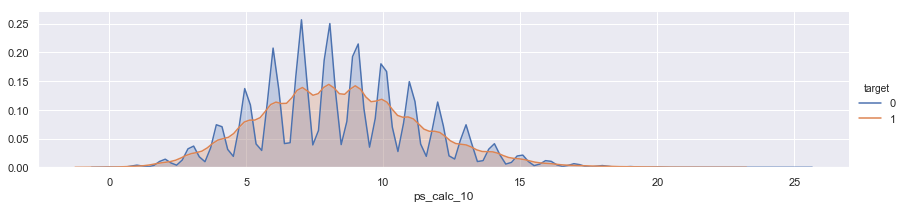

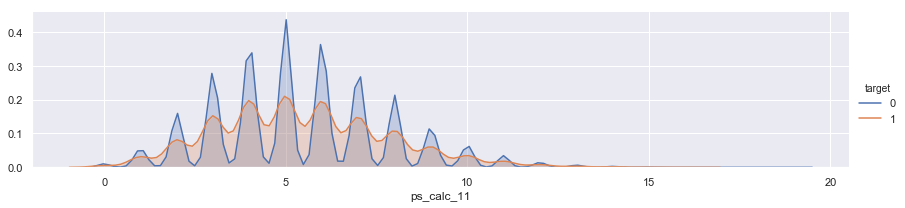

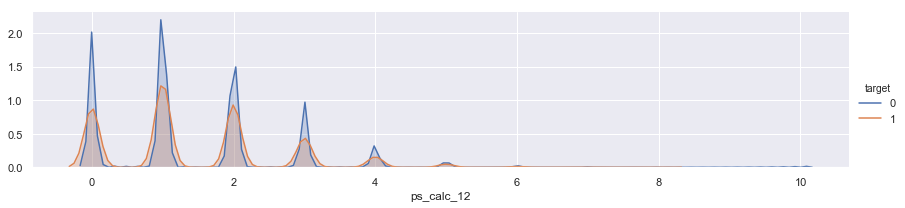

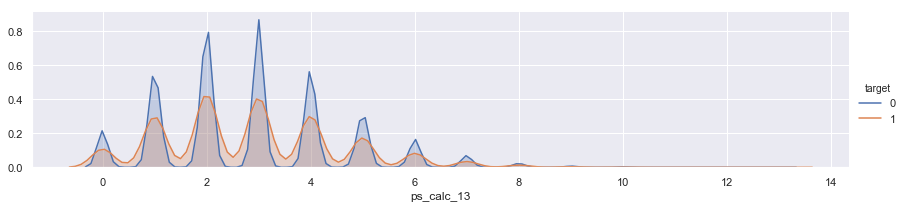

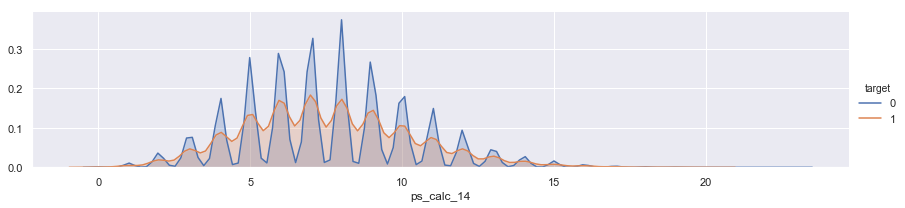

In [26]:
for i in numeric:
    grid = sns.FacetGrid(train, hue='target', aspect=4)
    grid.map(sns.kdeplot, i, shade=True)
    grid.add_legend()

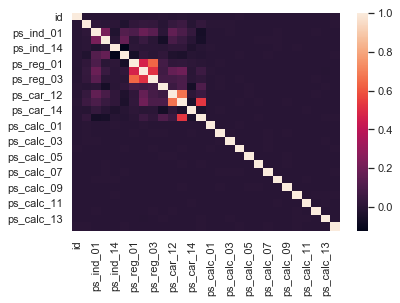

In [27]:
sns.heatmap(train[numeric].corr())

##  Relation between Nominal and Numerical Variable

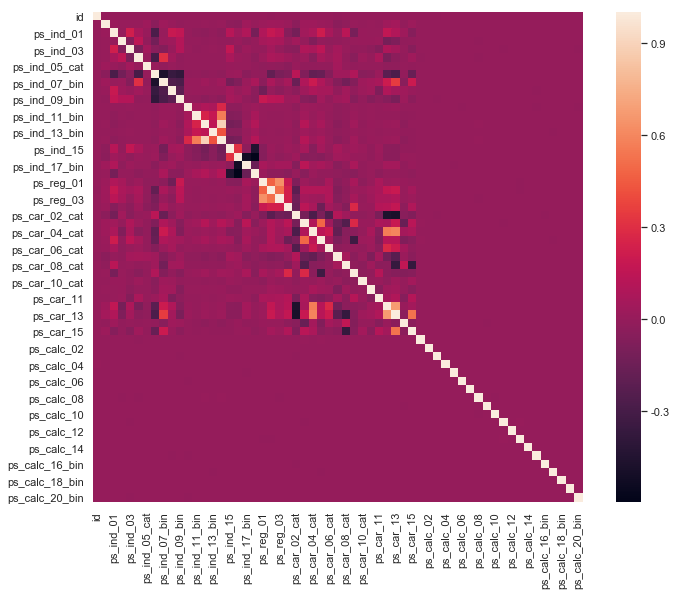

In [28]:
c_mat = train.corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(c_mat,square=True);

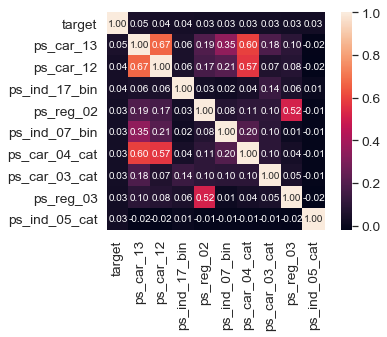

In [29]:
k = 10
cols = c_mat.nlargest(k,'target')['target'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Pre-processing

In [31]:
data = copy.copy(train)

## feature drop

In [32]:
missing_df.loc[missing_df['ratio'] != 0]

,column,count,ratio
3,ps_ind_02_cat,216,0.036290
5,ps_ind_04_cat,83,0.013945
6,ps_ind_05_cat,5809,0.975955
22,ps_reg_03,107772,18.106490
23,ps_car_01_cat,107,0.017977
24,ps_car_02_cat,5,0.000840
25,ps_car_03_cat,411231,69.089837
27,ps_car_05_cat,266551,44.782531
29,ps_car_07_cat,11489,1.930237
31,ps_car_09_cat,569,0.095596


결측값이 10% 이상인 변수 drop

In [33]:
data = data.drop(['ps_reg_03', 'ps_car_03_cat', 'ps_car_05_cat'], axis = 1)

In [34]:
categorical.remove('ps_car_03_cat')
categorical.remove('ps_car_05_cat')
numeric.remove('ps_reg_03')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 56 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_ca

## Missing value 처리

- 연속형 : 평균값으로 대체
- 범주형 : 최빈값으로 대체

In [36]:
cate_null = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_07_cat', 'ps_car_09_cat']
nume_null = ['ps_car_11', 'ps_car_12', 'ps_car_14']

In [37]:
for col in cate_null:
    data[col] = data[col].replace(-1, data[col].mode()[0])
    
for col in nume_null:
    data[col] = data[col].replace(-1, data[col].mean())

In [38]:
(data == -1).sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0
ps_calc_14        0


## Outlier 제거
평균 +- 3표준편차 값 제거

In [39]:
data.shape

(595212, 56)

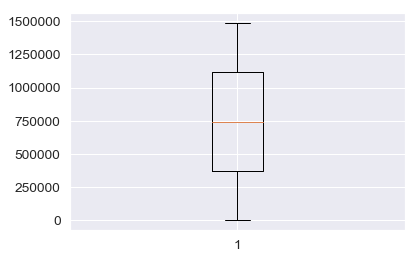

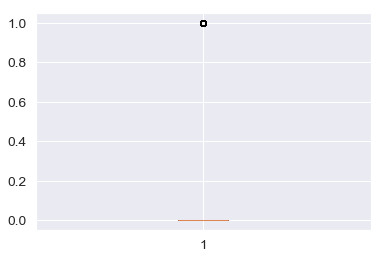

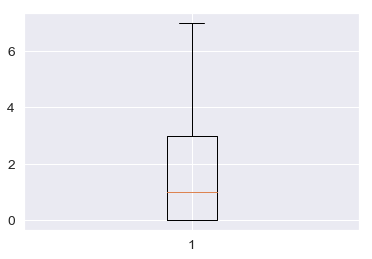

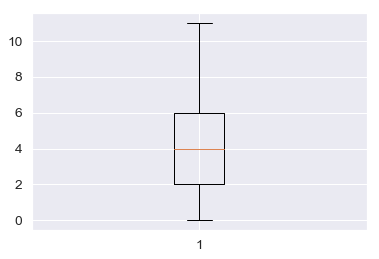

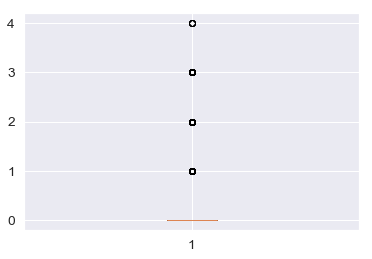

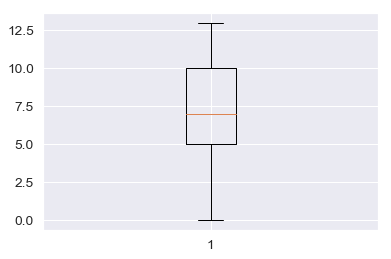

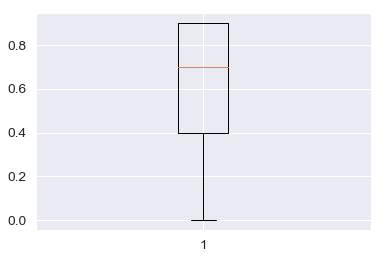

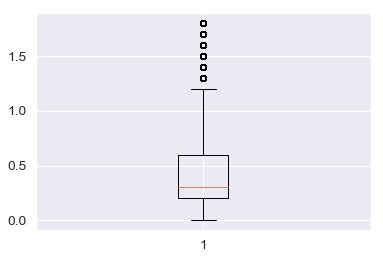

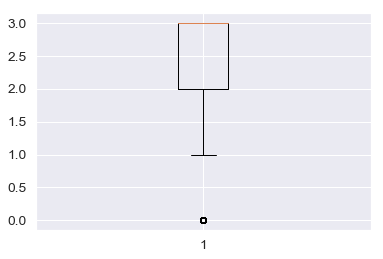

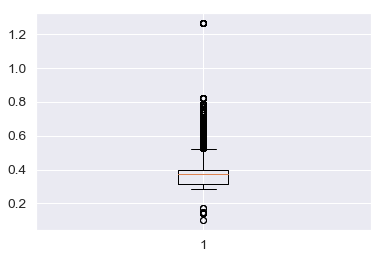

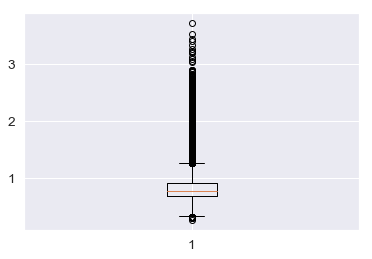

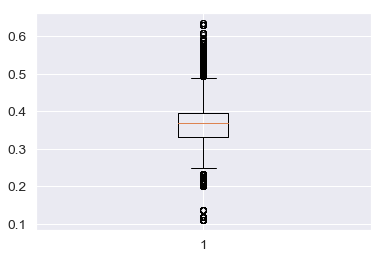

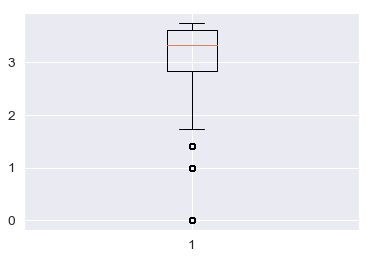

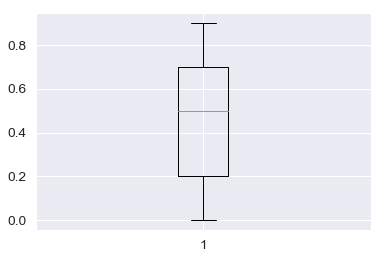

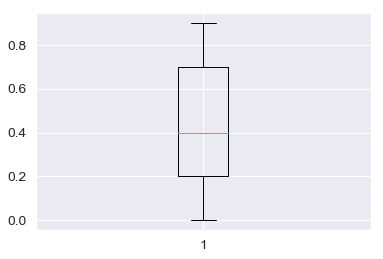

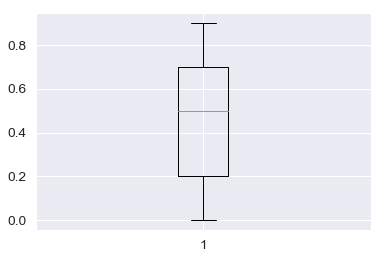

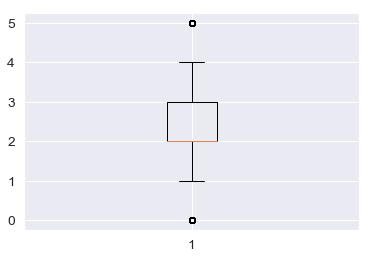

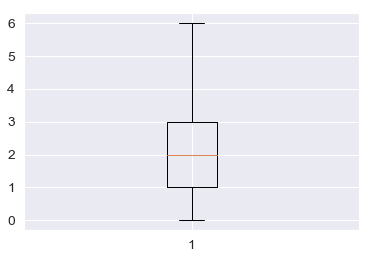

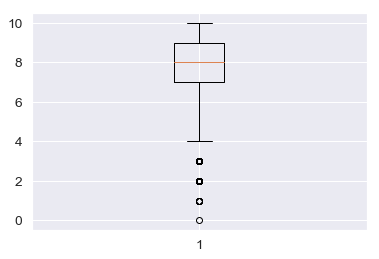

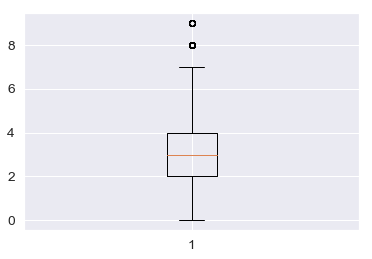

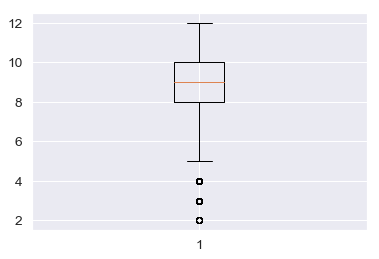

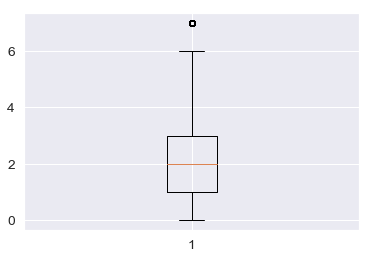

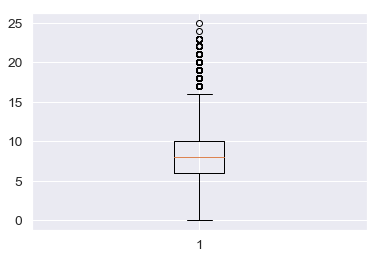

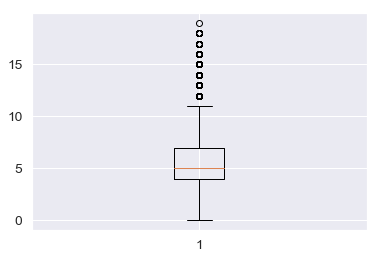

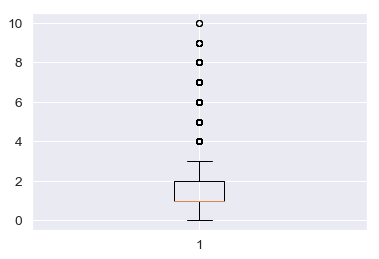

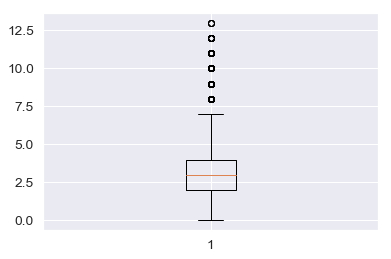

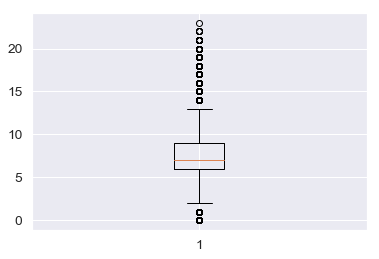

In [40]:
for col in numeric:
    plt.boxplot(data[col])
    plt.show()

In [41]:
for col in numeric:
    data = data[np.abs(data[col] - data[col].mean()) <= (3*data[col].std())] 

In [42]:
data.shape

(510611, 56)

최종적으로 modeling에 사용할 데이터 51만개

# Modeling

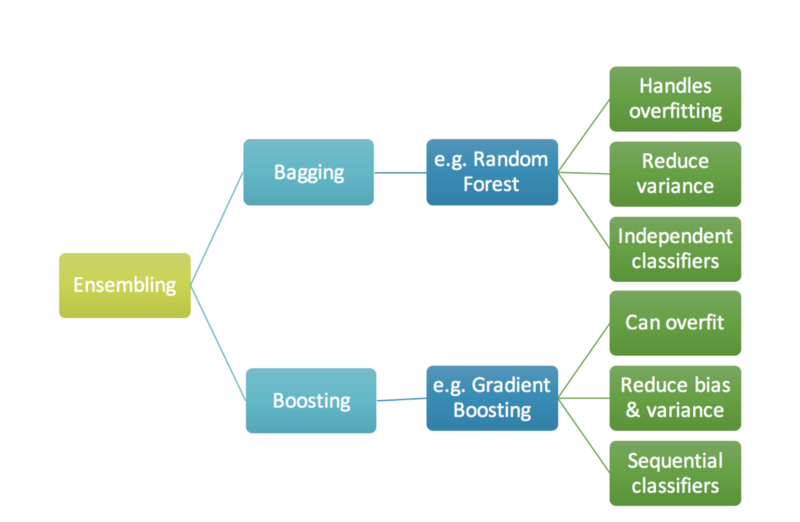

- GBM
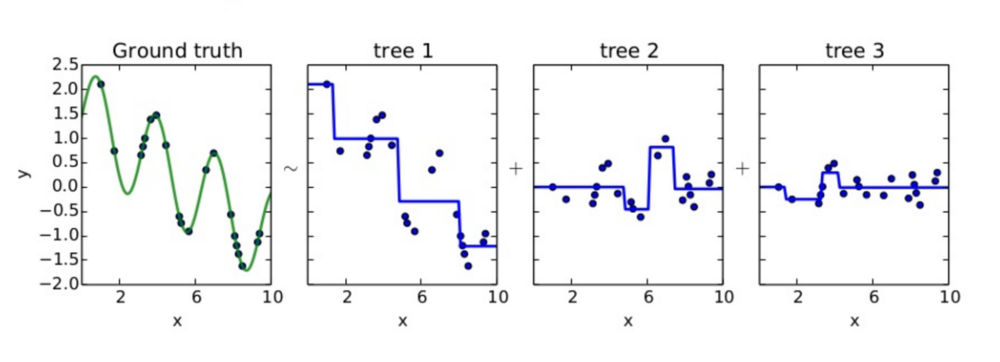
Reference : https://3months.tistory.com/368

- Kernel : Tune and compare XGB, LightGBM, Random Forest with Hyperopt
- Reference : https://www.kaggle.com/eikedehling/tune-and-compare-xgb-lightgbm-rf-with-hyperopt

In [1]:
import numpy as np
import pandas as pd

from hyperopt import hp, tpe # Hyperparameter Optimization
from hyperopt.fmin import fmin #finds the value of x that minimizes a function y(x) = x

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold # validation
from sklearn.metrics import make_scorer # gini calculate

import xgboost as xgb

import lightgbm as lgbm

In [2]:
from IPython.display import Image

## Gini 계수

[ 분류 모델의 성능 척도(불순도) ]
- Gini Coefficient(지니 계수)
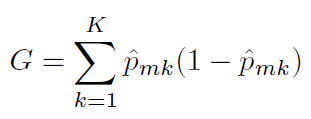
    - p^mk = m번째 노드에 있는 샘플 중 클래스 k에 속한 샘플의 비율
    - 0-0.5 값을 가짐

- Entropy(엔트로피)
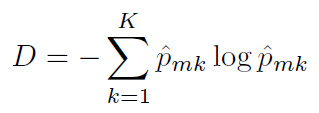
    - 0-1 값을 가짐
    - Informatioin gain(정보 이득) : 감소하는 엔트로피의 양

- Gini Coefficient가 조금 더 계산이 빠른 반면, 
- Entropy은 log 정규화과정을 거쳐 좀 더 균형 잡힌 트리를 만든다.
- 예제 : https://m.blog.naver.com/2011topcit/220611261399

In [3]:
df = pd.read_csv('train.csv')

In [4]:
X = df.drop(['id', 'target'], axis=1)
Y = df['target']

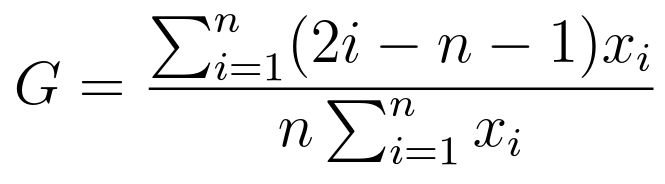

In [5]:
def gini(truth, predictions):
    g = np.asarray(np.c_[truth, predictions, np.arange(len(truth)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(truth) + 1) / 2.
    return gs / len(truth)

def gini_xgb(predictions, truth):
    truth = truth.get_label()
    return 'gini', -1.0 * gini(truth, predictions) / gini(truth, truth)

def gini_lgb(truth, predictions):
    score = gini(truth, predictions) / gini(truth, truth)
    return 'gini', score, True

def gini_sklearn(truth, predictions):
    return gini(truth, predictions) / gini(truth, truth)

gini_scorer = make_scorer(gini_sklearn, greater_is_better=True, needs_proba=True)
# greater_is_better : score_func가 스코어 함수(기본값)이고, 높으면 좋은지 
# 또는 손실 함수이고, 낮으면 좋은지 의미. default=True
# needs_proba : 스코어 함수가 predict_proba를 사용하여 분류 기준에서 확률 추정치를 얻어야하는지 여부
# default=False

## Random Forest

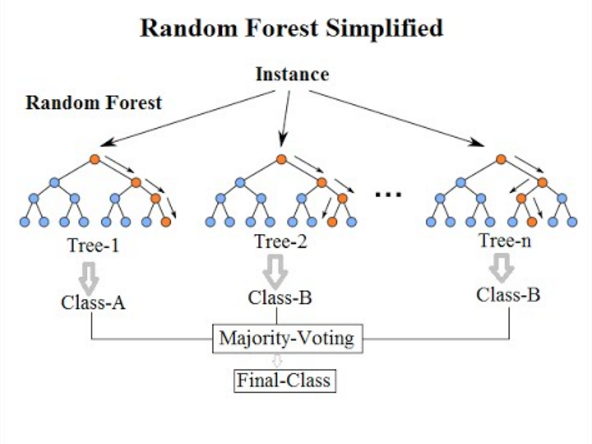

parameters
- n_estimators : 결정 트리 개수
- class_weight : 클래스별 가중치
- max_depth : Tree complexit, 트리 깊이 조정

In [6]:
def objective(params):
    params = {'n_estimators': int(params['n_estimators']), 'max_depth': int(params['max_depth'])}
    clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', **params)
    score = cross_val_score(clf, X, Y, scoring=gini_scorer, cv=StratifiedKFold(n_splits=3)).mean()
    #분류 문제는 계층적 k-fold 교차검증을 사용
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'n_estimators': hp.quniform('n_estimators', 25, 500, 25), #(label, row, high, step)
    'max_depth': hp.quniform('max_depth', 1, 10, 1)  #(label, row, high, step)
}

#finds the value of x that minimizes a function y(x) = x
best = fmin(fn=objective, #취할 함수
            space=space, #search할 공간, 범위
            algo=tpe.suggest, #검색 알고리즘, tree of Parzen estimators
            max_evals=10) #최대 평가 시행 횟수

Gini 0.248 params {'n_estimators': 325, 'max_depth': 5}                                                                
Gini 0.252 params {'n_estimators': 500, 'max_depth': 6}                                                                
Gini 0.255 params {'n_estimators': 275, 'max_depth': 8}                                                                
Gini 0.252 params {'n_estimators': 425, 'max_depth': 9}                                                                
Gini 0.254 params {'n_estimators': 425, 'max_depth': 7}                                                                
Gini 0.228 params {'n_estimators': 500, 'max_depth': 2}                                                                
Gini 0.243 params {'n_estimators': 300, 'max_depth': 4}                                                                
Gini 0.252 params {'n_estimators': 450, 'max_depth': 6}                                                                
Gini 0.254 params {'n_estimators': 425, 

In [7]:
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'max_depth': 2.0, 'n_estimators': 500.0}


최적의 하이퍼 파라미터 확인

## XGBoost

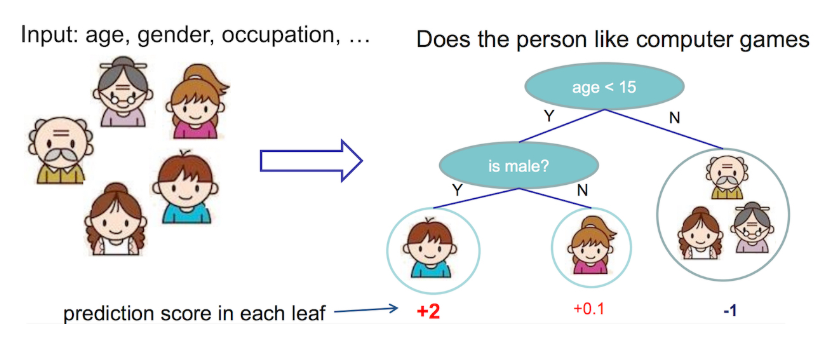

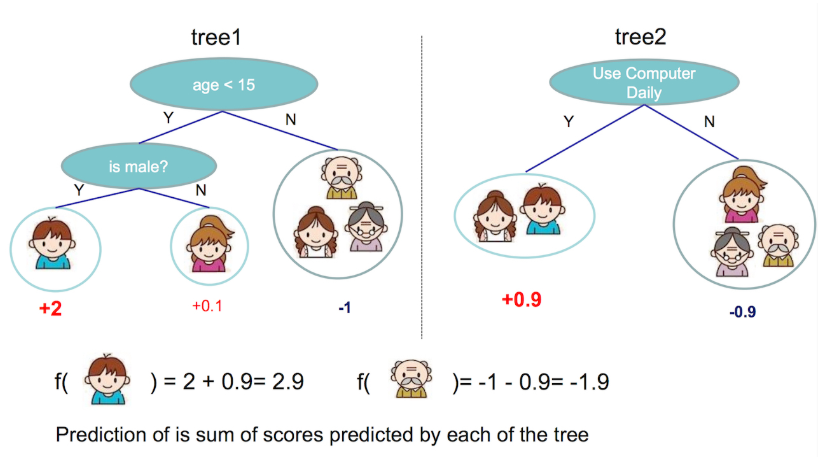
- Reperence1 : https://brunch.co.kr/@snobberys/137
- Reperence2 : https://m.blog.naver.com/PostView.nhn?blogId=tjdudwo93&logNo=221071886633&proxyReferer=https%3A%2F%2Fwww.google.com%2F

parameters
- gamma : 트리 노드에서 추가 파티션을 만들기 위해 필요한 최소 손실 감소량
    - 0-무한대 값, default=0, 클수록 보수적인 알고리즘
- colsample_bytree : 각 트리를 생성할 때 샘플링하는 열(변수) 비율, 0-1 값, default=1
- learning_rate : lambda, 바로 전 모델에 곱할 가중치(학습률)


In [8]:
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']), 
    }
    
    clf = xgb.XGBClassifier(
        n_estimators=250,
        learning_rate=0.05,
        n_jobs=4,
        **params
    )
    
    score = cross_val_score(clf, X, Y, scoring=gini_scorer, cv=StratifiedKFold(n_splits=3)).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

Gini 0.279 params {'max_depth': 6, 'gamma': '0.354', 'colsample_bytree': '0.325'}                                      
Gini 0.278 params {'max_depth': 5, 'gamma': '0.213', 'colsample_bytree': '0.973'}                                      
Gini 0.279 params {'max_depth': 5, 'gamma': '0.220', 'colsample_bytree': '0.475'}                                      
Gini 0.279 params {'max_depth': 5, 'gamma': '0.117', 'colsample_bytree': '0.326'}                                      
Gini 0.266 params {'max_depth': 2, 'gamma': '0.189', 'colsample_bytree': '0.309'}                                      
Gini 0.279 params {'max_depth': 5, 'gamma': '0.459', 'colsample_bytree': '0.756'}                                      
Gini 0.275 params {'max_depth': 3, 'gamma': '0.205', 'colsample_bytree': '0.608'}                                      
Gini 0.278 params {'max_depth': 4, 'gamma': '0.313', 'colsample_bytree': '0.356'}                                      
Gini 0.279 params {'max_depth': 5, 'gamm

In [9]:
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'colsample_bytree': 0.30873071454430795, 'gamma': 0.18912098722108, 'max_depth': 2.0}


최적의 하이퍼 파라미터 확인

## LightGBM

- XGBoost
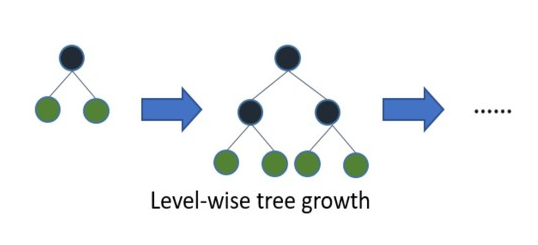

- LightGBM
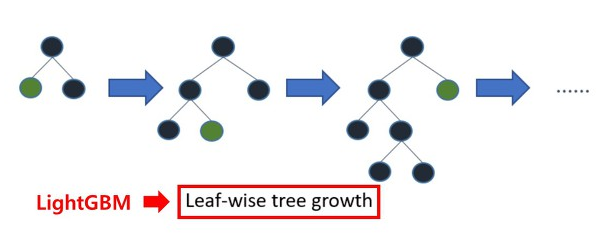
Reference : https://cdm98.tistory.com/m/31

parameters
- num_leaves : 트리 하나에 있을 수 있는 최대 leaf 수, default=31

In [10]:
def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = lgbm.LGBMClassifier(
        n_estimators=500,
        learning_rate=0.01,
        **params
    )
    
    score = cross_val_score(clf, X, Y, scoring=gini_scorer, cv=StratifiedKFold(n_splits=3)).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score 

space = {
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
}

best = fmin(fn=objective, 
            space=space,
            algo=tpe.suggest,
            max_evals=10)

Gini 0.277 params {'num_leaves': 100, 'colsample_bytree': '0.519'}                                                     
Gini 0.276 params {'num_leaves': 18, 'colsample_bytree': '0.862'}                                                      
Gini 0.276 params {'num_leaves': 16, 'colsample_bytree': '0.758'}                                                      
Gini 0.276 params {'num_leaves': 80, 'colsample_bytree': '0.982'}                                                      
Gini 0.276 params {'num_leaves': 18, 'colsample_bytree': '0.848'}                                                      
Gini 0.277 params {'num_leaves': 22, 'colsample_bytree': '0.797'}                                                      
Gini 0.278 params {'num_leaves': 46, 'colsample_bytree': '0.533'}                                                      
Gini 0.278 params {'num_leaves': 44, 'colsample_bytree': '0.749'}                                                      
Gini 0.277 params {'num_leaves': 122, 'c

In [11]:
print("Hyperopt estimated optimum {}".format(best))

Hyperopt estimated optimum {'colsample_bytree': 0.7581410429243542, 'num_leaves': 16.0}


최적의 하이퍼 파라미터 확인

## Comparing the models

In [12]:
rf_model = RandomForestClassifier(
    n_jobs=4,
    class_weight='balanced',
    n_estimators=325,
    max_depth=5 
)

xgb_model = xgb.XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    n_jobs=4,
    max_depth=2,
    colsample_bytree=0.7, 
    gamma=0.15 
)

lgbm_model = lgbm.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.01,
    num_leaves=16,
    colsample_bytree=0.7
)

models = [
    ('Random Forest', rf_model),
    ('XGBoost', xgb_model),
    ('LightGBM', lgbm_model),
]

for label, model in models:
    scores = cross_val_score(model, X, Y, cv=StratifiedKFold(n_splits=3), scoring=gini_scorer) 
    print("Gini coefficient: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), label))

Gini coefficient: 0.2479 (+/- 0.0018) [Random Forest]
Gini coefficient: 0.2681 (+/- 0.0017) [XGBoost]
Gini coefficient: 0.2755 (+/- 0.0015) [LightGBM]
